In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets

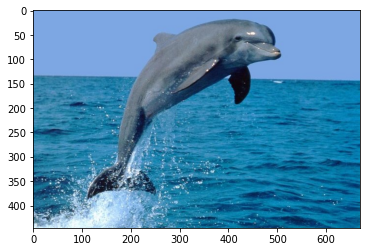

In [2]:
img = matim.imread('./images/dolphin.jpg')
plt.imshow(img)

### Edge Preserving Filter

In [7]:
@widgets.interact_manual(s=(0,200,1),r=(0,1,0.1))
def edgePreserve(s=50,r=0.5):
    edgeImg = cv2.edgePreservingFilter(img,sigma_s=s,sigma_r=r)
    # display output
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1) # orginal image
    plt.imshow(img)
    plt.yticks([]),plt.xticks([])
    plt.title('Orignal Image')
    plt.subplot(1,2,2) # filtered image
    plt.imshow(edgeImg)
    plt.title('Filter Image')
    plt.yticks([]),plt.xticks([])
    plt.show()

interactive(children=(IntSlider(value=50, description='s', max=200), FloatSlider(value=0.5, description='r', m…

###  Detail Enhance

In [8]:
@widgets.interact(s=(0,200,1),r=(0,1,0.1))
def detail(s=20,r=0.2):
    detaiImg = cv2.detailEnhance(img,sigma_s=s,sigma_r=r)
    # display output
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1) # orginal image
    plt.imshow(img)
    plt.yticks([]),plt.xticks([])
    plt.title('Orignal Image')
    plt.subplot(1,2,2) # filtered image
    plt.imshow(detaiImg)
    plt.title('Detail Enhance')
    plt.yticks([]),plt.xticks([])
    plt.show()

interactive(children=(IntSlider(value=20, description='s', max=200), FloatSlider(value=0.2, description='r', m…

---
![image.png](./PPT/cartoonize_image_pencil_sketch.png)

In [7]:
def adjust_gamma(image,gamma=1):
    invGamma = 1.0 / gamma
    table = np.array([((i/255)**invGamma)*255 for i in np.arange(0,256)]) # lookup table
    lut_img = cv2.LUT(image.astype(np.uint8),table.astype(np.uint8))
    return lut_img

In [10]:
path = './images/dolphin.jpg'
img = matim.imread(path)

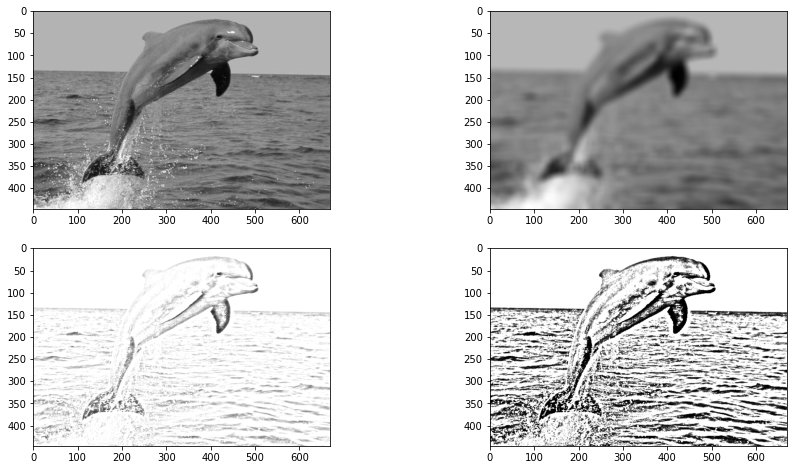

In [16]:
#pencil sketch
ksize = 21
sigmaX = 9
gamma = 0.1
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX) # ksize = 3 to 25 and sigmax = 1 to 15
gray_blur_divide = cv2.divide(gray,gray_blur,scale=256)
pencil_sktech = adjust_gamma(gray_blur_divide,gamma=gamma)#0 - 1


# display output
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(gray_blur,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(gray_blur_divide,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(pencil_sktech,cmap='gray')

In [19]:
@widgets.interact_manual(ksize=(3,25,2),sigmaX=(1,15,2),gamma=(0,1,0.01))
def pencil_art_image(ksize=21,sigmaX=9,gamma=0.1):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX) # ksize = 3 to 25 and sigmax = 1 to 15
    gray_blur_divide = cv2.divide(gray,gray_blur,scale=256)
    pencil_sktech = adjust_gamma(gray_blur_divide,gamma=gamma)#0 - 1
    # display the output
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1) # orginal image
    plt.imshow(img)
    plt.yticks([]),plt.xticks([])
    plt.title('Orignal Image')
    plt.subplot(1,2,2) # filtered image
    plt.imshow(pencil_sktech,cmap='gray')
    plt.title('Pencil Sketch')
    plt.yticks([]),plt.xticks([])
    plt.show()

interactive(children=(IntSlider(value=21, description='ksize', max=25, min=3, step=2), IntSlider(value=9, desc…

![image](./PPT/cartoonize_image_cartoon.png)

In [20]:
img = matim.imread('./images/dolphin.jpg')

In [21]:
# Edge Mask
def edge_mask(img,ksize,block_size):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_median = cv2.medianBlur(gray,ksize)
    edges = cv2.adaptiveThreshold(gray_median,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY,block_size,ksize)
    return edges

In [27]:
edge_img = edge_mask(img,5,9)

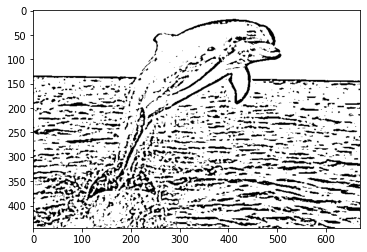

In [28]:
plt.imshow(edge_img,cmap='gray')

### K Means Clustering

In [30]:
def kmeans_cluster(img,k):
    # transform image
    data = np.float32(img).reshape((-1,3))

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    # k means
    ret, label, center = cv2.kmeans(data,k,None,criteria,5,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [31]:
cluster_img = kmeans_cluster(img,6)

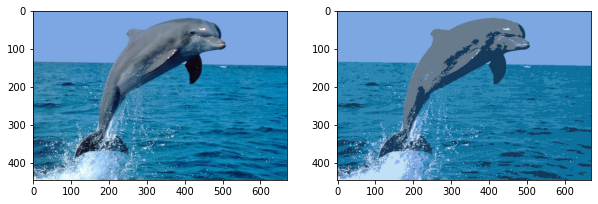

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(cluster_img)

In [35]:
# apply bilateral filter
d = 7
sigmacolor = 200 # greater 100
sigmaspace = 200 # greater 200
bilateral = cv2.bilateralFilter(cluster_img,d=d,sigmaColor=sigmacolor,sigmaSpace=sigmaspace)
cartoon = cv2.bitwise_and(bilateral,bilateral,mask=edge_img)

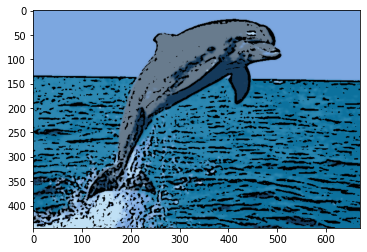

In [36]:
plt.imshow(cartoon)

In [3]:
# image to cartoon widgets

def edge_mask(img,ksize,block_size):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_median = cv2.medianBlur(gray,ksize)
    edges = cv2.adaptiveThreshold(gray_median,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY,block_size,ksize)
    return edges

def kmeans_cluster(img,k):
    # transform image
    data = np.float32(img).reshape((-1,3))

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    # k means
    ret, label, center = cv2.kmeans(data,k,None,criteria,5,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [38]:
img = matim.imread('./images/dolphin.jpg')

In [39]:
# cartoonizing
@widgets.interact_manual(ksize=(1,21,2),block_size=(1,21,2),k=(1,20,1),
                         d=(5,15,2),sigmacolor=(1,300),sigmaspace=(1,300))
def cartoon_image(ksize=5,block_size=7,k=7,d=7,sigmacolor=200,sigmaspace=200):
    # step-1: edge_mask, kmeans
    edgeMask =  edge_mask(img,ksize,block_size)
    cluster_img = kmeans_cluster(img,k)
    # step-2: apply bilateral filter
    bilateral = cv2.bilateralFilter(cluster_img,d=d,sigmaColor=sigmacolor,sigmaSpace=sigmaspace)
    cartoon = cv2.bitwise_and(bilateral,bilateral,mask=edgeMask)
    # display
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1) # orginal image
    plt.imshow(img)
    plt.yticks([]),plt.xticks([])
    plt.title('Orignal Image')
    plt.subplot(1,2,2) # filtered image
    plt.imshow(cartoon)
    plt.title('Cartoon Image')
    plt.yticks([]),plt.xticks([])
    plt.show()

interactive(children=(IntSlider(value=5, description='ksize', max=21, min=1, step=2), IntSlider(value=7, descr…

# App

In [5]:
img = matim.imread('./images/g1.jpg')

In [9]:
@widgets.interact_manual(style=['detail','pencil','cartoon'])
def app(style='pencil'):
    if style == 'detail':
        # ---------- detail enhance
        @widgets.interact_manual(s=(0,200,1),r=(0,1,0.1))
        def detail(s=20,r=0.2):
            detaiImg = cv2.detailEnhance(img,sigma_s=s,sigma_r=r)
            # display output
            plt.figure(figsize=(15,8))
            plt.subplot(1,2,1) # orginal image
            plt.imshow(img)
            plt.yticks([]),plt.xticks([])
            plt.title('Orignal Image')
            plt.subplot(1,2,2) # filtered image
            plt.imshow(detaiImg)
            plt.title('Detail Enhance')
            plt.yticks([]),plt.xticks([])
            plt.show()

    elif style=='pencil':
        # ---------- pencil art
        @widgets.interact_manual(ksize=(3,25,2),sigmaX=(1,15,2),gamma=(0,1,0.01))
        def pencil_art_image(ksize=21,sigmaX=9,gamma=0.1):
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX) # ksize = 3 to 25 and sigmax = 1 to 15
            gray_blur_divide = cv2.divide(gray,gray_blur,scale=256)
            pencil_sktech = adjust_gamma(gray_blur_divide,gamma=gamma)#0 - 1
            # display the output
            plt.figure(figsize=(15,8))
            plt.subplot(1,2,1) # orginal image
            plt.imshow(img)
            plt.yticks([]),plt.xticks([])
            plt.title('Orignal Image')
            plt.subplot(1,2,2) # filtered image
            plt.imshow(pencil_sktech,cmap='gray')
            plt.title('Pencil Sketch')
            plt.yticks([]),plt.xticks([])
            plt.show()


    elif style =='cartoon':
        # cartoonizing
        @widgets.interact_manual(ksize=(1,21,2),block_size=(1,21,2),k=(1,20,1),
                                 d=(5,15,2),sigmacolor=(1,300),sigmaspace=(1,300))
        def cartoon_image(ksize=5,block_size=7,k=7,d=7,sigmacolor=200,sigmaspace=200):
            # step-1: edge_mask, kmeans
            edgeMask =  edge_mask(img,ksize,block_size)
            cluster_img = kmeans_cluster(img,k)
            # step-2: apply bilateral filter
            bilateral = cv2.bilateralFilter(cluster_img,d=d,sigmaColor=sigmacolor,sigmaSpace=sigmaspace)
            cartoon = cv2.bitwise_and(bilateral,bilateral,mask=edgeMask)
            # display
            plt.figure(figsize=(15,8))
            plt.subplot(1,2,1) # orginal image
            plt.imshow(img)
            plt.yticks([]),plt.xticks([])
            plt.title('Orignal Image')
            plt.subplot(1,2,2) # filtered image
            plt.imshow(cartoon)
            plt.title('Cartoon Image')
            plt.yticks([]),plt.xticks([])
            plt.show()


interactive(children=(Dropdown(description='style', index=1, options=('detail', 'pencil', 'cartoon'), value='p…

In [10]:
def pencil_art_image(ksize=21,sigmaX=9,gamma=0.1):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX) # ksize = 3 to 25 and sigmax = 1 to 15
    gray_blur_divide = cv2.divide(gray,gray_blur,scale=256)
    pencil_sktech = adjust_gamma(gray_blur_divide,gamma=gamma)#0 - 1
    return pencil_sktech

In [11]:
def cartoon_image(ksize=5,block_size=7,k=7,d=7,sigmacolor=200,sigmaspace=200):
    # step-1: edge_mask, kmeans
    edgeMask =  edge_mask(img,ksize,block_size)
    cluster_img = kmeans_cluster(img,k)
    # step-2: apply bilateral filter
    bilateral = cv2.bilateralFilter(cluster_img,d=d,sigmaColor=sigmacolor,sigmaSpace=sigmaspace)
    cartoon = cv2.bitwise_and(bilateral,bilateral,mask=edgeMask)
    return cartoon

In [12]:
pen = pencil_art_image(7,5,0.23)

In [18]:
cv2.imwrite('pencil.png',pen)

True

In [14]:
cat = cartoon_image(5,7,6,9,148,149)

In [17]:
matim.imsave('cat.png',cat)